In [8]:
import sys
print("Versão do python desse projeto",sys.version)

Versão do python desse projeto 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import joblib
from flask import Flask, request, jsonify

In [11]:
df = pd.read_csv("C:\Python\creditcard.csv")

In [12]:
df.head(11)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


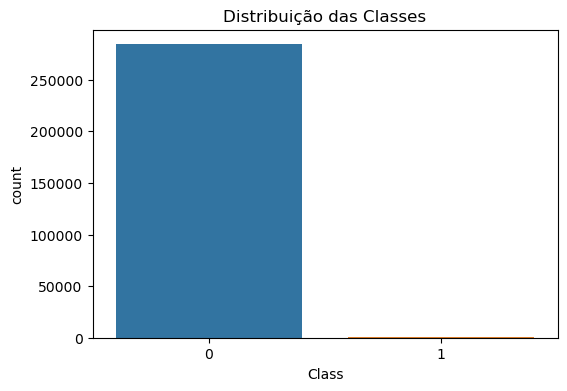

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Distribuição das Classes')
plt.show()

In [16]:
print(df['Amount'].describe())

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


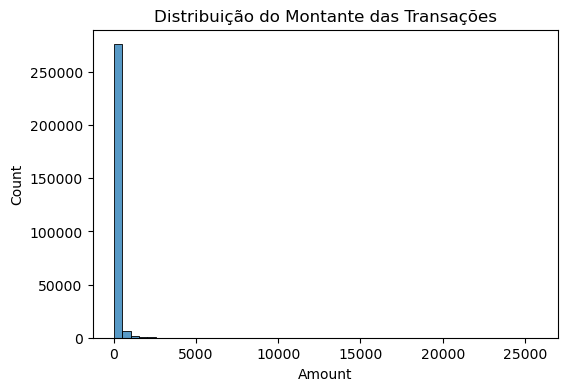

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df['Amount'], bins=50)
plt.title('Distribuição do Montante das Transações')
plt.show()

In [18]:
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time_Scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))


In [19]:
df = df.drop(['Time','Amount'], axis=1)

In [20]:
print(df.isnull().sum())

V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Class            0
Amount_Scaled    0
Time_Scaled      0
dtype: int64


In [21]:
X = df.drop('Class', axis=1)
y = df['Class']

In [22]:
fraud_count = len(df[df['Class'] == 1])

In [23]:
fraud_indices = df[df['Class'] == 1].index
normal_indices = df[df['Class'] == 0].index

In [24]:
random_normal_indices = np.random.choice(normal_indices, fraud_count, replace=False)
random_normal_indices = np.array(random_normal_indices)

In [25]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

In [26]:
under_sample_data = df.iloc[under_sample_indices, :]

In [27]:
X_under = under_sample_data.drop('Class', axis=1)
y_under = under_sample_data['Class']

In [28]:
print(under_sample_data['Class'].value_counts())

Class
1    492
0    492
Name: count, dtype: int64


In [29]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(
    X_under, y_under, test_size=0.3, random_state=42)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [33]:
lr = LogisticRegression()
lr.fit(X_train_under, y_train_under)

LogisticRegression()

In [34]:
y_pred_under = lr.predict(X_test_under)

In [37]:
print('Métricas para Regressão Logística (Dados Balanceados):')
print(classification_report(y_test_under, y_pred_under))

Métricas para Regressão Logística (Dados Balanceados):
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       146
           1       0.96      0.90      0.93       150

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [38]:
lr_original = LogisticRegression()
lr_original.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = lr_original.predict(X_test)

In [40]:
print('Métricas para Regressão Logística (Dados Originais):')
print(classification_report(y_test, y_pred))

Métricas para Regressão Logística (Dados Originais):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.64      0.74       136

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



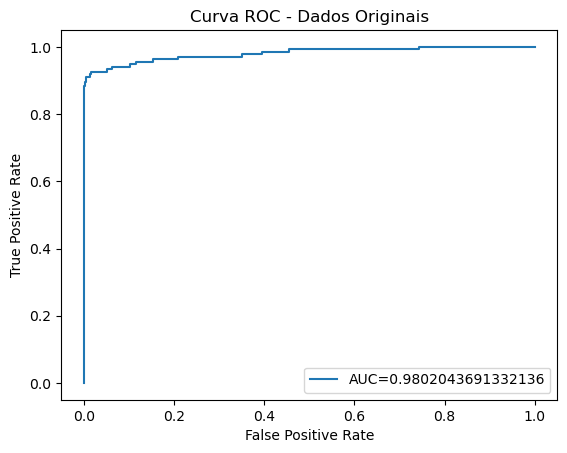

In [43]:
y_pred_proba = lr_original.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.title('Curva ROC - Dados Originais')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

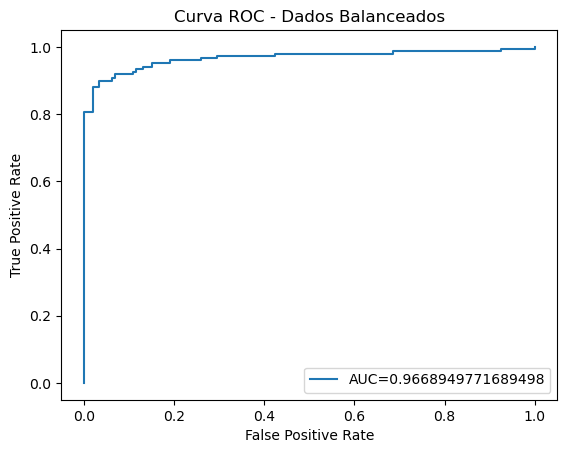

In [44]:
y_pred_proba_under = lr.predict_proba(X_test_under)[::,1]
fpr_under, tpr_under, _ = roc_curve(y_test_under,  y_pred_proba_under)
auc_under = roc_auc_score(y_test_under, y_pred_proba_under)

plt.plot(fpr_under,tpr_under,label="AUC="+str(auc_under))
plt.legend(loc=4)
plt.title('Curva ROC - Dados Balanceados')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [45]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

In [46]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')
grid.fit(X_train_under, y_train_under)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='f1')

In [47]:
best_lr = grid.best_estimator_

In [48]:
y_pred_grid = best_lr.predict(X_test_under)
print('Métricas após otimização:')
print(classification_report(y_test_under, y_pred_grid))

Métricas após otimização:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       146
           1       0.96      0.89      0.92       150

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



In [51]:
joblib.dump(best_lr, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']